In [1]:
import pandas as pd   
import numpy as np  
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy.stats import levene
from scipy.stats import f_oneway
from scipy.stats import shapiro
from scipy.stats import ttest_ind
import numpy as np

In [79]:
#read csv
nash_crime_df=pd.read_csv('../data/Nashville/Metro_Nashville_Police.csv')
nash_unemployment_df=pd.read_csv('../data/Nashville/Unemployment_Nashville-Davidson.csv')
nash_population_df=pd.read_csv('../data/Nashville/Nashville_population.csv')
louis_crime_df=pd.read_csv('../data/Louisville_Data/Louisville_Crime_Data_2023.csv')
louis_population_df=pd.read_csv('../data/Louisville_Data/Louisville_Population.csv')
louis_unemployment_df=pd.read_csv('../data/Louisville_Data/Unemployment Rate_Louisville_Jefferson County.csv')
birm_unemployment_df=pd.read_csv('../data/Birmingham_Data/Unemployment Rate_Birmingham-Hoover.csv')
birm_population_df=pd.read_csv('../data/Birmingham_Data/Alabama.csv')
birm_crime_north_df=pd.read_excel('../data/Birmingham_Data/open-data-north-2023.xlsx')
birm_crime_south_df=pd.read_excel('../data/Birmingham_Data/open-data-north-2023.xlsx')
birm_crime_west_df=pd.read_excel('../data/Birmingham_Data/open-data-west-2023.xlsx')
birm_crime_east_df=pd.read_excel('../data/Birmingham_Data/opendataportal-east-2023.xlsx')                                  
                                  

/var/folders/th/jsjzrfgj5mqb0ntmxxmc9pmm0000gn/T/ipykernel_47505/1757383050.py:5: DtypeWarning: Columns (0,10,14) have mixed types. Specify dtype option on import or set low_memory=False.
  louis_crime_df=pd.read_csv('../data/Louisville_Data/Louisville_Crime_Data_2023.csv')


In [3]:
nash_crime_df.head()


,Primary Key,Incident Number,Report Type,Report Type Description,Incident Status Code,Incident Status Description,Investigation Status,Incident Occurred,Incident Reported,Incident Location,...,Weapon Description,Victim Number,Domestic Related,Victim Type,Victim Description,Victim Gender,Victim Race,Victim Ethnicity,Victim County Resident,Mapped Location
0,20190496213_11,20190496213,D,DISPATCHED,U,UNFOUNDED,Closed,07/01/2019 05:31:00 PM,07/01/2019 06:17:00 PM,2410 2410,...,NONE,1,True,I,INDIVIDUAL (18 AND OVER),M,W,Non-Hispanic,RESIDENT,POINT (-86.696 36.218)
1,20180290646_11,20180290646,D,DISPATCHED,A,CLEARED BY ARREST,Closed,03/31/2018 12:21:00 PM,03/31/2018 07:41:00 PM,5824 5824,...,NONE,1,False,B,BUSINESS,NaN,NaN,NaN,NaN,POINT (-86.713 36.042)
2,20200243837_11,20200243837,D,DISPATCHED,U,UNFOUNDED,Closed,04/06/2020 11:15:00 AM,04/06/2020 01:11:00 PM,3144 3144,...,NONE,1,False,G,GOVERNMENT,NaN,NaN,NaN,NaN,POINT (-86.759 36.232)
3,20170471747_11,20170471747,D,DISPATCHED,U,UNFOUNDED,Closed,05/29/2017 02:33:00 AM,05/29/2017 04:27:00 AM,1714 1714,...,NONE,1,False,I,INDIVIDUAL (18 AND OVER),M,W,Non-Hispanic,RESIDENT,POINT (-86.907 36.086)
4,20171099391_21,20171099391,D,DISPATCHED,A,CLEARED BY ARREST,Closed,12/16/2017 06:30:00 PM,12/16/2017 10:44:00 PM,1101 1101,...,PERSONAL (HANDS),1,True,I,INDIVIDUAL (18 AND OVER),F,B,Non-Hispanic,RESIDENT,POINT (-86.586 36.178)


In [80]:
nash_unemployment_df.head()

,Series ID,Year,Period,Label,Value
0,LAUCA474000000000004,2021,M01,2021 Jan,54892
1,LAUCA474000000000004,2021,M02,2021 Feb,52123
2,LAUCA474000000000004,2021,M03,2021 Mar,50828
3,LAUCA474000000000004,2021,M04,2021 Apr,48648
4,LAUCA474000000000004,2021,M05,2021 May,45838


In [5]:
nash_crime_df.columns

Index(['Primary Key', 'Incident Number', 'Report Type',
       'Report Type Description', 'Incident Status Code',
       'Incident Status Description', 'Investigation Status',
       'Incident Occurred', 'Incident Reported', 'Incident Location',
       'Latitude', 'Longitude', 'ZIP Code', 'RPA', 'Zone', 'Location Code',
       'Location Description', 'Offense Number', 'Offense NIBRS',
       'Offense Description', 'Weapon Primary', 'Weapon Description',
       'Victim Number', 'Domestic Related', 'Victim Type',
       'Victim Description', 'Victim Gender', 'Victim Race',
       'Victim Ethnicity', 'Victim County Resident', 'Mapped Location'],
      dtype='object')

In [6]:
nash_population_df.head()

,Series ID,Year,Period,Label,Value
0,LAUCA474000000000004,2021,M01,2021 Jan,54892
1,LAUCA474000000000004,2021,M02,2021 Feb,52123
2,LAUCA474000000000004,2021,M03,2021 Mar,50828
3,LAUCA474000000000004,2021,M04,2021 Apr,48648
4,LAUCA474000000000004,2021,M05,2021 May,45838


In [7]:
louis_crime_df.head()

,Incident_Number,Date_Reported,Date_Occurred,Badge_ID,Offense_Classification,Offense_Code_Name,NIBRS_Code,NIBRS_Group,Was_Offense_Completed,LMPD_Division,LMPD_Beat,Location_Category,Block_Address,City,Zip_Code,ObjectId
0,LMPD23121718,12/11/2023,2023/12/09 05:00:00+00,8585.0,23 THEFT OTHER,THEFT OF MAIL MATTER 514.140 23265 23H,23H,A,Yes,1st Division,123,Residence/Home,800 BLOCK W MUHAMMAD ALI BLVD,LOUISVILLE,40203,1
1,LMPD23121610,12/11/2023,2023/12/01 05:00:00+00,8585.0,23 THEFT OTHER,THEFT OF PROP MISLAID OR DELIVER BY IMISTAKE 5...,23H,A,Yes,7th Division,724,Convenience Store,11800 BLOCK STANDIFORD PLAZA DR,LOUISVILLE,40229,2
2,LMPD23121685,12/11/2023,2023/12/10 05:00:00+00,8142.0,23 THEFT OTHER,"TBUT OR DISP ALL OTHERS $10,000 < $1,000,000 5...",23H,A,Yes,3rd Division,323,Parking/ Drop Lot/ Garage,1200 BLOCK OUTER LOOP,LOUISVILLE,40219,3
3,LMPD23121633,12/11/2023,2023/12/09 05:00:00+00,8142.0,24 VANDALISM,CRIMINAL MISCHIEF-3RD DEGREE 512.040 01403 290,290,A,Yes,7th Division,723,Residence/Home,7500 BLOCK FARMHOUSE LN,LOUISVILLE,40291,4
4,LMPD23121790,12/11/2023,2023/12/10 05:00:00+00,5597.0,19 THEFT FR BLDG,"TBUT OR DISP FROM BUILDING $1,000 < $10,000 51...",23D,A,Yes,5th Division,512,Service/Gas Station,1100 BLOCK BARDSTOWN RD,LOUISVILLE,40204,5


In [8]:
louis_crime_df['Offense_Classification']

0           23 THEFT OTHER
1           23 THEFT OTHER
2           23 THEFT OTHER
3             24 VANDALISM
4         19 THEFT FR BLDG
               ...        
65559       23 THEFT OTHER
65560    99 NON-REPORTABLE
65561        14 AUTO THEFT
65562    99 NON-REPORTABLE
65563      21 THEFT FR VEH
Name: Offense_Classification, Length: 65564, dtype: object

In [9]:
Offense_name=louis_crime_df['Offense_Classification'].str.extract(r'(\d+)\s+(.*)')
Offense_name.rename(columns={0: 'Number',1: 'Offense_Classification'})
louis_crime_df1=louis_crime_df.copy()
louis_crime_df1[['Number','Offense_Classification']]=louis_crime_df1['Offense_Classification'].str.extract(r'(\d+)\s+(.*)')
louis_crime_df1.head()
#new_id_column=gourds_df['id'].str.split("-", expand=True)
#new_id_column.rename(columns={0: 'Year',1: 'Type'})
#df['Offense_Code_Name'].str.split(r'\$(\d+)', expand=True)
#gourds_df2=gourds_df.copy()
#gourds_df2[['Year', 'Type']]=gourds_df2['id'].str.split("-", expand=True)
#gourds_df2.head(5)

,Incident_Number,Date_Reported,Date_Occurred,Badge_ID,Offense_Classification,Offense_Code_Name,NIBRS_Code,NIBRS_Group,Was_Offense_Completed,LMPD_Division,LMPD_Beat,Location_Category,Block_Address,City,Zip_Code,ObjectId,Number
0,LMPD23121718,12/11/2023,2023/12/09 05:00:00+00,8585.0,THEFT OTHER,THEFT OF MAIL MATTER 514.140 23265 23H,23H,A,Yes,1st Division,123,Residence/Home,800 BLOCK W MUHAMMAD ALI BLVD,LOUISVILLE,40203,1,23
1,LMPD23121610,12/11/2023,2023/12/01 05:00:00+00,8585.0,THEFT OTHER,THEFT OF PROP MISLAID OR DELIVER BY IMISTAKE 5...,23H,A,Yes,7th Division,724,Convenience Store,11800 BLOCK STANDIFORD PLAZA DR,LOUISVILLE,40229,2,23
2,LMPD23121685,12/11/2023,2023/12/10 05:00:00+00,8142.0,THEFT OTHER,"TBUT OR DISP ALL OTHERS $10,000 < $1,000,000 5...",23H,A,Yes,3rd Division,323,Parking/ Drop Lot/ Garage,1200 BLOCK OUTER LOOP,LOUISVILLE,40219,3,23
3,LMPD23121633,12/11/2023,2023/12/09 05:00:00+00,8142.0,VANDALISM,CRIMINAL MISCHIEF-3RD DEGREE 512.040 01403 290,290,A,Yes,7th Division,723,Residence/Home,7500 BLOCK FARMHOUSE LN,LOUISVILLE,40291,4,24
4,LMPD23121790,12/11/2023,2023/12/10 05:00:00+00,5597.0,THEFT FR BLDG,"TBUT OR DISP FROM BUILDING $1,000 < $10,000 51...",23D,A,Yes,5th Division,512,Service/Gas Station,1100 BLOCK BARDSTOWN RD,LOUISVILLE,40204,5,19


In [10]:
louis_population_df.head()

,Series ID,Year,Period,Label,Value
0,LAUMT213114000000003,2021,M01,2021 Jan,5.1
1,LAUMT213114000000003,2021,M02,2021 Feb,4.6
2,LAUMT213114000000003,2021,M03,2021 Mar,4.6
3,LAUMT213114000000003,2021,M04,2021 Apr,4.2
4,LAUMT213114000000003,2021,M05,2021 May,3.8


In [11]:
louis_unemployment_df.head()

,Series ID,Year,Period,Label,Value
0,LAUMT213114000000003,2021,M01,2021 Jan,5.1
1,LAUMT213114000000003,2021,M02,2021 Feb,4.6
2,LAUMT213114000000003,2021,M03,2021 Mar,4.6
3,LAUMT213114000000003,2021,M04,2021 Apr,4.2
4,LAUMT213114000000003,2021,M05,2021 May,3.8


In [12]:
birm_unemployment_df.head()

,Series ID,Year,Period,Label,Value
0,LAUMT011382000000003,2021,M01,2021 Jan,4.1
1,LAUMT011382000000003,2021,M02,2021 Feb,3.8
2,LAUMT011382000000003,2021,M03,2021 Mar,3.4
3,LAUMT011382000000003,2021,M04,2021 Apr,3.0
4,LAUMT011382000000003,2021,M05,2021 May,2.9


In [13]:
birm_population_df.head()

,Series ID,Year,Period,Label,Value
0,LAUMT011382000000003,2021,M01,2021 Jan,4.1
1,LAUMT011382000000003,2021,M02,2021 Feb,3.8
2,LAUMT011382000000003,2021,M03,2021 Mar,3.4
3,LAUMT011382000000003,2021,M04,2021 Apr,3.0
4,LAUMT011382000000003,2021,M05,2021 May,2.9


In [14]:
birm_crime_north_df.head()

,Block,Street,Case Address Latitude,Case Address Longitude,Case Address Zip,Case Occurred From Date,Case Offense Statute Description,Reporting District
0,NaN,19TH ST N,33.518551,-86.811302,35203.0,11/30/2023 12:00:00,Theft-From Public Building-1st Degree,N122
1,NaN,26TH ST N,33.553396,-86.818906,35207.0,11/30/2023 11:45:00,"Larceny/Theft-Shoplifting, less than $500",N131
2,NaN,17TH ST N,33.512548,-86.810036,35203.0,11/30/2023,Theft of Property Auto Theft 1st,N122
3,NaN,31ST AVE N,33.553181,-86.817887,35207.0,11/29/2023 18:30:00,Theft by deception,N131
4,NaN,6TH AVE W,NaN,NaN,NaN,11/29/2023 13:00:00,Theft from Residence 4th Degree,N120


In [15]:
birm_crime_south_df.head()

,Block,Street,Case Address Latitude,Case Address Longitude,Case Address Zip,Case Occurred From Date,Case Offense Statute Description,Reporting District
0,NaN,19TH ST N,33.518551,-86.811302,35203.0,11/30/2023 12:00:00,Theft-From Public Building-1st Degree,N122
1,NaN,26TH ST N,33.553396,-86.818906,35207.0,11/30/2023 11:45:00,"Larceny/Theft-Shoplifting, less than $500",N131
2,NaN,17TH ST N,33.512548,-86.810036,35203.0,11/30/2023,Theft of Property Auto Theft 1st,N122
3,NaN,31ST AVE N,33.553181,-86.817887,35207.0,11/29/2023 18:30:00,Theft by deception,N131
4,NaN,6TH AVE W,NaN,NaN,NaN,11/29/2023 13:00:00,Theft from Residence 4th Degree,N120


In [16]:
most_common_crime_Birm=birm_crime_south_df['Case Offense Statute Description'].value_counts().idxmax()
most_common_crime_Birm

'Theft of Property Auto Theft 1st '

In [17]:
birm_crime_west_df.head()

,Block,Street,Case Address Latitude,Case Address Longitude,Case Address Zip,Case Occurred From Date,Case Offense Statute Description,Reporting District
0,500,16TH WAY SW,33.490053,-86.862152,35211.0,11/30/2023 23:02:00,Disch Firearm into Occupied Bldg/Veh,W429
1,500,16TH WAY SW,33.490053,-86.862152,35211.0,11/30/2023 23:02:00,Aggravated Assault Non-Family-Gun-2nd Degree,W429
2,600,CANDLE LN,33.541728,-86.865778,35214.0,11/30/2023 21:58:00,Theft from Residence 4th Degree,W439
3,1500,51ST ST,33.483066,-86.890583,35208.0,11/30/2023 17:00:00,Theft of Property Auto Theft 1st,W432
4,1100,4TH AVE W,33.506463,-86.856604,35204.0,11/30/2023 16:00:00,Aggravated Assault Family-Gun-2nd Degree,W430


In [18]:
birm_crime_east_df.shape

(2061, 10)

In [19]:
top_ten_common_crime_nashville=nash_crime_df['Offense Description'].value_counts()
top_ten_common_crime_nashville.head(10)

Offense Description
POLICE INQUIRY                    161627
BURGLARY- MOTOR VEHICLE            65366
SIMPLE ASSLT                       52181
DAMAGE PROP - PRIVATE              41836
SHOPLIFTING                        33710
FOUND PROPERTY                     29121
RECOVERY, STOLEN PROPERTY          27925
LOST PROPERTY                      27909
ASSAULT- FEAR OF BODILY INJURY     26981
VEHICLE THEFT                      25998
Name: count, dtype: int64

In [20]:
#What are the most common types of crimes reported in each of the three cities, and how do they compare?
most_common_crime_nashville=nash_crime_df['Offense Description'].value_counts().idxmax()
most_common_crime_nashville

'POLICE INQUIRY'

In [21]:
louis_crime_df[['Offense_Text', 'Offense_Numbers']] = louis_crime_df['Offense_Code_Name'].str.extract(r'(.+?)\s*(\$?\d+.*)', expand=True)
louis_crime_df[['Offense_Text', 'Offense_Numbers']]

,Offense_Text,Offense_Numbers
0,THEFT OF MAIL MATTER,514.140 23265 23H
1,THEFT OF PROP MISLAID OR DELIVER BY IMISTAKE,514.050(1) 23472 23H
2,TBUT OR DISP ALL OTHERS,"$10,000 < $1,000,000 514.030 24098 23H"
3,CRIMINAL MISCHIEF-,3RD DEGREE 512.040 01403 290
4,TBUT OR DISP FROM BUILDING,"$1,000 < $10,000 514.030 24162 23D"
...,...,...
65559,TBUT OR DISP FIREARM,514.030 23100 23H
65560,PROPERTY NO ARREST,999.999 89999 999
65561,TBUT OR DISP AUTO,"$10,000 < $1,000,000 514.030 24113 240"
65562,PRELIMINARY REPORT NUMBER,999.999 99999 999


In [22]:
louis_crime_df[['Offense_Text', 'Offense_Numbers']]=louis_crime_df['Offense_Code_Name'].str.extract(r'(.+?)\s*(\$?\d+.*)', expand=True)
louis_crime_df.head()

,Incident_Number,Date_Reported,Date_Occurred,Badge_ID,Offense_Classification,Offense_Code_Name,NIBRS_Code,NIBRS_Group,Was_Offense_Completed,LMPD_Division,LMPD_Beat,Location_Category,Block_Address,City,Zip_Code,ObjectId,Offense_Text,Offense_Numbers
0,LMPD23121718,12/11/2023,2023/12/09 05:00:00+00,8585.0,23 THEFT OTHER,THEFT OF MAIL MATTER 514.140 23265 23H,23H,A,Yes,1st Division,123,Residence/Home,800 BLOCK W MUHAMMAD ALI BLVD,LOUISVILLE,40203,1,THEFT OF MAIL MATTER,514.140 23265 23H
1,LMPD23121610,12/11/2023,2023/12/01 05:00:00+00,8585.0,23 THEFT OTHER,THEFT OF PROP MISLAID OR DELIVER BY IMISTAKE 5...,23H,A,Yes,7th Division,724,Convenience Store,11800 BLOCK STANDIFORD PLAZA DR,LOUISVILLE,40229,2,THEFT OF PROP MISLAID OR DELIVER BY IMISTAKE,514.050(1) 23472 23H
2,LMPD23121685,12/11/2023,2023/12/10 05:00:00+00,8142.0,23 THEFT OTHER,"TBUT OR DISP ALL OTHERS $10,000 < $1,000,000 5...",23H,A,Yes,3rd Division,323,Parking/ Drop Lot/ Garage,1200 BLOCK OUTER LOOP,LOUISVILLE,40219,3,TBUT OR DISP ALL OTHERS,"$10,000 < $1,000,000 514.030 24098 23H"
3,LMPD23121633,12/11/2023,2023/12/09 05:00:00+00,8142.0,24 VANDALISM,CRIMINAL MISCHIEF-3RD DEGREE 512.040 01403 290,290,A,Yes,7th Division,723,Residence/Home,7500 BLOCK FARMHOUSE LN,LOUISVILLE,40291,4,CRIMINAL MISCHIEF-,3RD DEGREE 512.040 01403 290
4,LMPD23121790,12/11/2023,2023/12/10 05:00:00+00,5597.0,19 THEFT FR BLDG,"TBUT OR DISP FROM BUILDING $1,000 < $10,000 51...",23D,A,Yes,5th Division,512,Service/Gas Station,1100 BLOCK BARDSTOWN RD,LOUISVILLE,40204,5,TBUT OR DISP FROM BUILDING,"$1,000 < $10,000 514.030 24162 23D"


In [23]:
#top ten crime reported in Louisville, KY
top_ten_common_crime_louisville=louis_crime_df['Offense_Text'].value_counts()
top_ten_common_crime_louisville.head(10)

Offense_Text
TBUT OR DISP AUTO                           6565
ASSAULT -                                   5648
DOMESTIC ABUSE DUTIES OF LAW ENFORCEMENT    5129
CRIMINAL MISCHIEF-                          3781
TBUT OR DISP CONTENTS FROM VEH              3748
BURGLARY -                                  3223
TERRORISTIC THREATENING                     2597
TBUT OR DISP SHOPLIFTING                    2463
CRIMINAL MISCHIEF -                         2306
TBUT OR DISP ALL OTHERS                     2094
Name: count, dtype: int64

In [24]:
#most common types of crimes #Theft by Unlawful Taking
most_common_crime_louisville=louis_crime_df['Offense_Text'].value_counts().idxmax()
most_common_crime_louisville


'TBUT OR DISP AUTO'

In [25]:
birm_crime_df = pd.concat([birm_crime_north_df, birm_crime_south_df, birm_crime_east_df, birm_crime_west_df], ignore_index=True)
birm_crime_df.head() #6269 rows × 10 columns

,Block,Street,Case Address Latitude,Case Address Longitude,Case Address Zip,Case Occurred From Date,Case Offense Statute Description,Reporting District,Case Offense Statute,Case ORI
0,NaN,19TH ST N,33.518551,-86.811302,35203.0,11/30/2023 12:00:00,Theft-From Public Building-1st Degree,N122,NaN,NaN
1,NaN,26TH ST N,33.553396,-86.818906,35207.0,11/30/2023 11:45:00,"Larceny/Theft-Shoplifting, less than $500",N131,NaN,NaN
2,NaN,17TH ST N,33.512548,-86.810036,35203.0,11/30/2023,Theft of Property Auto Theft 1st,N122,NaN,NaN
3,NaN,31ST AVE N,33.553181,-86.817887,35207.0,11/29/2023 18:30:00,Theft by deception,N131,NaN,NaN
4,NaN,6TH AVE W,NaN,NaN,NaN,11/29/2023 13:00:00,Theft from Residence 4th Degree,N120,NaN,NaN


In [26]:
case_offense_column=birm_crime_df['Case Offense Statute Description']
case_offense_column

0                  Theft-From Public Building-1st Degree
1              Larceny/Theft-Shoplifting, less than $500
2                      Theft of Property Auto Theft 1st 
3                                     Theft by deception
4                        Theft from Residence 4th Degree
                              ...                       
6264               Domestic Strangulation or Suffocation
6265    Sodomy-With A Woman-Domestic Violence-1st Degree
6266            Aggravated Assault Family-Gun-1st Degree
6267                Disch Firearm into Occupied Bldg/Veh
6268                Disch Firearm into Occupied Bldg/Veh
Name: Case Offense Statute Description, Length: 6269, dtype: object

In [27]:
#top ten crime reported in Birmingham, AL
top_ten_common_crime_Birmingham=birm_crime_df['Case Offense Statute Description'].value_counts()
top_ten_common_crime_Birmingham.head(10)

Case Offense Statute Description
Theft of Property Auto Theft 1st             1323
Disch Firearm into Occupied Bldg/Veh          502
Burglary (Residence) Force 3rd Degree         458
Miscellaneous Theft-3rd Degree                404
Theft - TOP 2nd Degree                        362
Larceny/Theft-Shoplifting, less than $500     272
Burglary-Residence-No Force-3rd Degree        215
Theft-Firearms-2nd Degree                     175
Domestic Strangulation or Suffocation         167
Larceny/Theft-TOP 2 $500-less than $1500      152
Name: count, dtype: int64

In [28]:
#most common types of crimes
most_common_crime_Birmingham=birm_crime_df['Case Offense Statute Description'].value_counts().idxmax()
most_common_crime_Birmingham

'Theft of Property Auto Theft 1st '

In [29]:
#visualisation to compare the three cities
top_ten_common_crime_louisville=louis_crime_df['Offense_Text'].value_counts()
top_ten_common_crime_nashville=nash_crime_df['Offense Description'].value_counts()
top_ten_common_crime_Birmingham=birm_crime_df['Case Offense Statute Description'].value_counts()


#gourds_df['est_weight'] = pd.to_numeric(gourds_df['est_weight'], errors='coerce')
#gourds_df['weight_lbs'] = pd.to_numeric(gourds_df['weight_lbs'], errors='coerce')


In [30]:
#frequency = df['column_name'].value_counts(normalize=True)
#print(frequency)

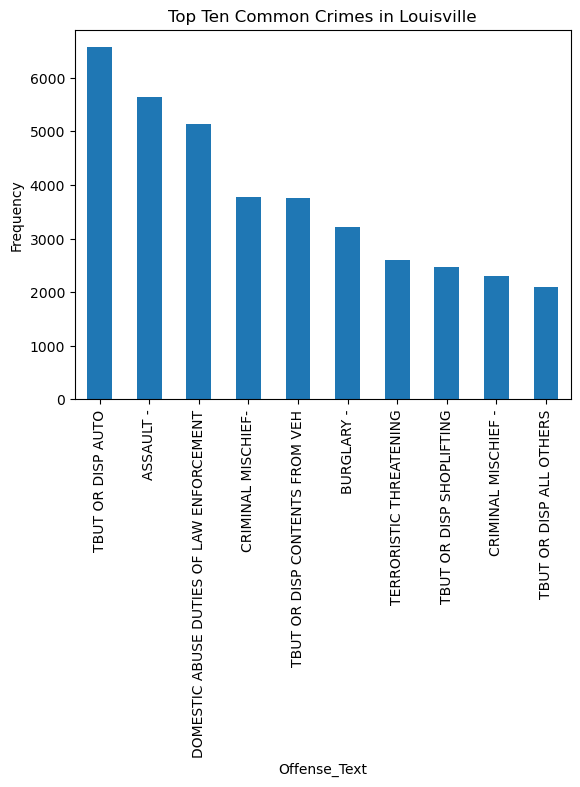

In [31]:
top_ten_common_crime_louisville = louis_crime_df['Offense_Text'].value_counts()
top_ten_common_crime_louisville.head(10).plot(kind='bar')
plt.title('Top Ten Common Crimes in Louisville')
plt.xlabel('Offense_Text')
plt.ylabel('Frequency')
plt.show()

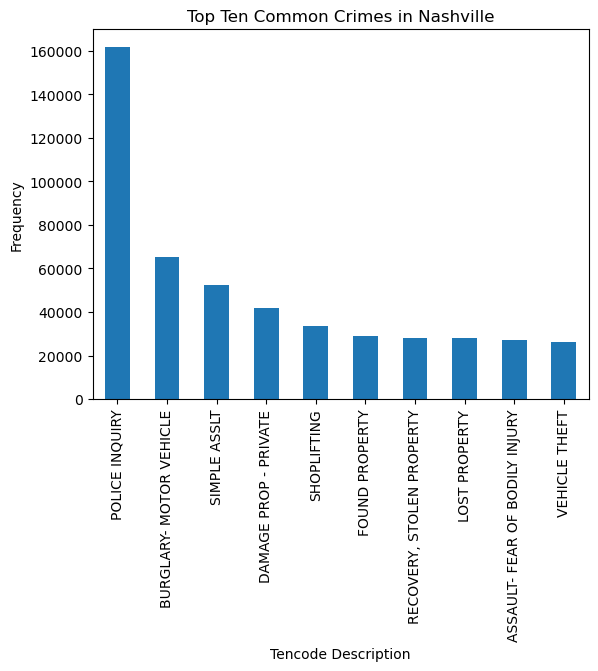

In [32]:
top_ten_common_crime_nashville = nash_crime_df['Offense Description'].value_counts()
top_ten_common_crime_nashville.head(10).plot(kind='bar')
plt.title('Top Ten Common Crimes in Nashville')
plt.xlabel('Tencode Description')
plt.ylabel('Frequency')
plt.show()

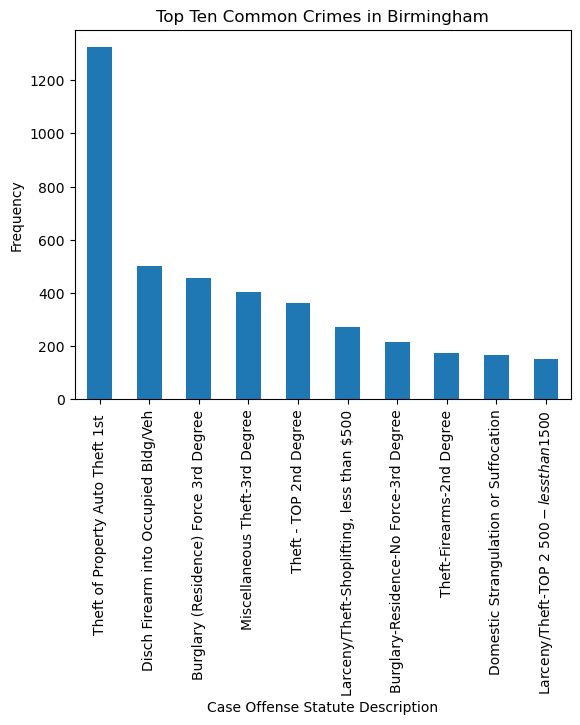

In [33]:
top_ten_common_crime_Birmingham = birm_crime_df['Case Offense Statute Description'].value_counts()
top_ten_common_crime_Birmingham.head(10).plot(kind='bar')
plt.title('Top Ten Common Crimes in Birmingham')
plt.xlabel('Case Offense Statute Description')
plt.ylabel('Frequency')
plt.show()

In [34]:
top_ten_common_crime_louisville = louis_crime_df['Offense_Text'].value_counts().head(10)
top_ten_common_crime_nashville = nash_crime_df['Offense Description'].value_counts().head(10)
top_ten_common_crime_Birmingham = birm_crime_df['Case Offense Statute Description'].value_counts().head(10)

In [35]:
#accross three cities
combined_crimes = pd.DataFrame({
    'Louisville': top_ten_common_crime_louisville,
    'Nashville': top_ten_common_crime_nashville,
    'Birmingham': top_ten_common_crime_Birmingham
    })

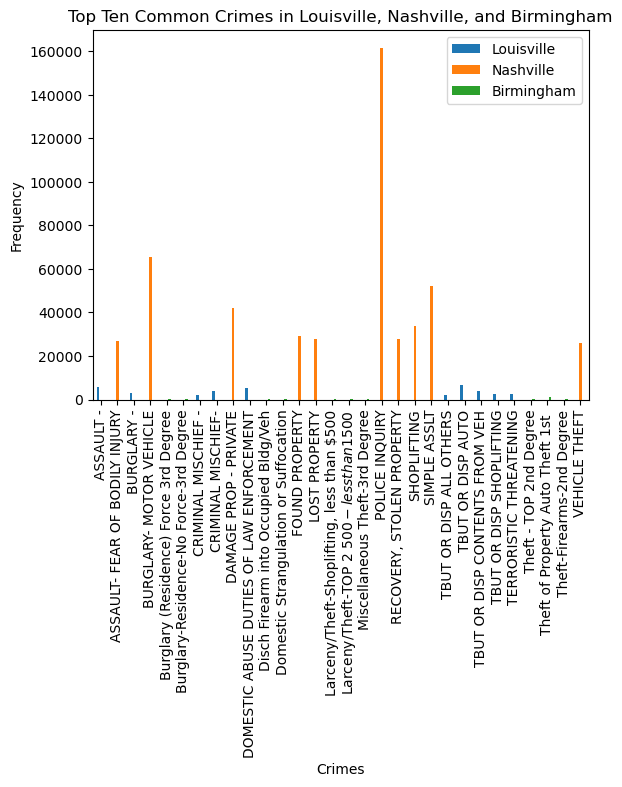

In [36]:
#visualisation to compare the three cities #Nashville has a higher crime rate
combined_crimes.plot(kind='bar')
plt.title('Top Ten Common Crimes in Louisville, Nashville, and Birmingham')
plt.xlabel('Crimes')
plt.ylabel('Frequency')
plt.show()

In [37]:
top_three_common_crime_Birmingham=birm_crime_df['Case Offense Statute Description'].value_counts()
top_three_common_crime_Birmingham.head(3)

Case Offense Statute Description
Theft of Property Auto Theft 1st         1323
Disch Firearm into Occupied Bldg/Veh      502
Burglary (Residence) Force 3rd Degree     458
Name: count, dtype: int64

In [38]:
top_three_common_crime_louisville = louis_crime_df['Offense_Text'].value_counts()
top_three_common_crime_louisville.head(3)

Offense_Text
TBUT OR DISP AUTO                           6565
ASSAULT -                                   5648
DOMESTIC ABUSE DUTIES OF LAW ENFORCEMENT    5129
Name: count, dtype: int64

In [39]:
top_three_common_crime_nashville = nash_crime_df['Offense Description'].value_counts()
top_three_common_crime_nashville.head(3)

Offense Description
POLICE INQUIRY             161627
BURGLARY- MOTOR VEHICLE     65366
SIMPLE ASSLT                52181
Name: count, dtype: int64

In [40]:
top_ten_common_crime_louisville = louis_crime_df['Offense_Text'].value_counts().head(10)
top_ten_common_crime_nashville = nash_crime_df['Offense Description'].value_counts().head(10)
top_ten_common_crime_Birmingham = birm_crime_df['Case Offense Statute Description'].value_counts().head(10)

In [41]:
combined_crimes = pd.DataFrame({
    'Louisville': top_ten_common_crime_louisville,
    'Nashville': top_ten_common_crime_nashville,
    'Birmingham': top_ten_common_crime_Birmingham
})

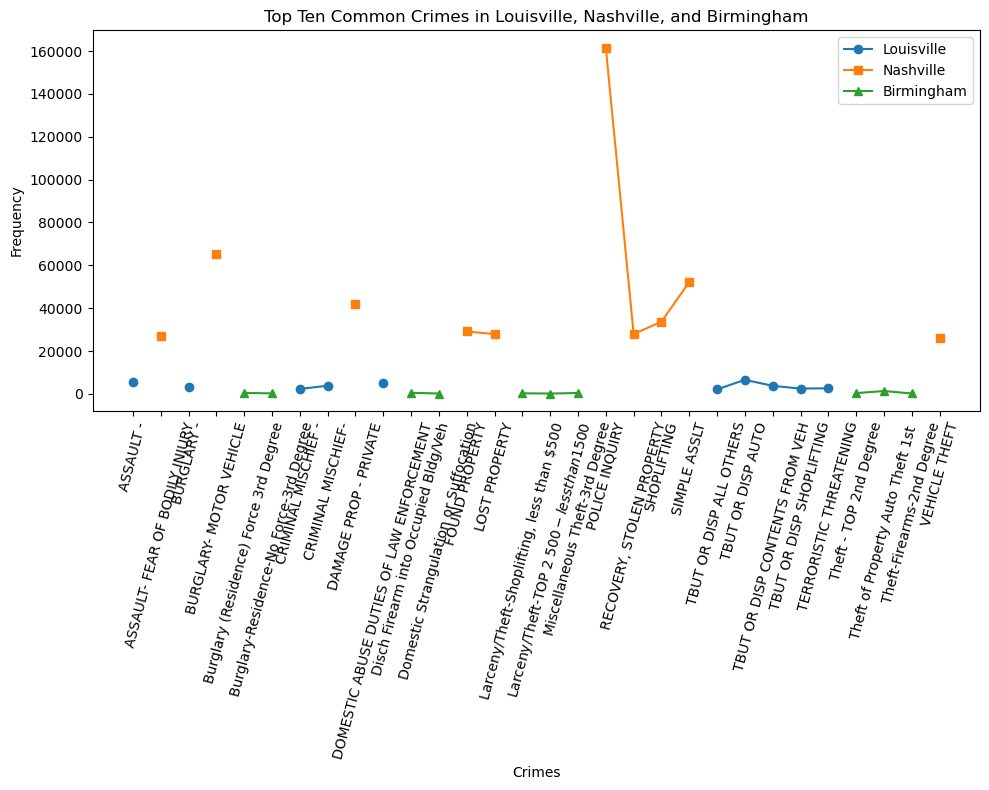

In [42]:
combined_crimes.reset_index(inplace=True)
plt.figure(figsize=(10, 8))
plt.plot(combined_crimes['index'], combined_crimes['Louisville'], label='Louisville', marker='o')
plt.plot(combined_crimes['index'], combined_crimes['Nashville'], label='Nashville', marker='s')
plt.plot(combined_crimes['index'], combined_crimes['Birmingham'], label='Birmingham', marker='^')

plt.title('Top Ten Common Crimes in Louisville, Nashville, and Birmingham')
plt.xlabel('Crimes')
plt.ylabel('Frequency')
plt.xticks(rotation=75) 
plt.legend()
plt.tight_layout() 
plt.show()

In [56]:
#Are there any discernible patterns in the times of day or days of the week 
#when crimes are most frequently reported in each city?
#nash_crime_df.head()
time_pattern=nash_crime_df.groupby('Incident Reported')['Offense Description'].mean
time_pattern

<bound method GroupBy.mean of <pandas.core.groupby.generic.SeriesGroupBy object at 0x2a068dc10>>

In [44]:
nash_crime_df.head()

,Primary Key,Incident Number,Report Type,Report Type Description,Incident Status Code,Incident Status Description,Investigation Status,Incident Occurred,Incident Reported,Incident Location,...,Weapon Description,Victim Number,Domestic Related,Victim Type,Victim Description,Victim Gender,Victim Race,Victim Ethnicity,Victim County Resident,Mapped Location
0,20190496213_11,20190496213,D,DISPATCHED,U,UNFOUNDED,Closed,07/01/2019 05:31:00 PM,07/01/2019 06:17:00 PM,2410 2410,...,NONE,1,True,I,INDIVIDUAL (18 AND OVER),M,W,Non-Hispanic,RESIDENT,POINT (-86.696 36.218)
1,20180290646_11,20180290646,D,DISPATCHED,A,CLEARED BY ARREST,Closed,03/31/2018 12:21:00 PM,03/31/2018 07:41:00 PM,5824 5824,...,NONE,1,False,B,BUSINESS,NaN,NaN,NaN,NaN,POINT (-86.713 36.042)
2,20200243837_11,20200243837,D,DISPATCHED,U,UNFOUNDED,Closed,04/06/2020 11:15:00 AM,04/06/2020 01:11:00 PM,3144 3144,...,NONE,1,False,G,GOVERNMENT,NaN,NaN,NaN,NaN,POINT (-86.759 36.232)
3,20170471747_11,20170471747,D,DISPATCHED,U,UNFOUNDED,Closed,05/29/2017 02:33:00 AM,05/29/2017 04:27:00 AM,1714 1714,...,NONE,1,False,I,INDIVIDUAL (18 AND OVER),M,W,Non-Hispanic,RESIDENT,POINT (-86.907 36.086)
4,20171099391_21,20171099391,D,DISPATCHED,A,CLEARED BY ARREST,Closed,12/16/2017 06:30:00 PM,12/16/2017 10:44:00 PM,1101 1101,...,PERSONAL (HANDS),1,True,I,INDIVIDUAL (18 AND OVER),F,B,Non-Hispanic,RESIDENT,POINT (-86.586 36.178)


In [45]:
nash_crime_df['Incident Reported'] = pd.to_datetime(nash_crime_df['Incident Reported'])
nash_crime_df['Incident Reported'] = nash_crime_df['Incident Reported'].dt.time
nash_crime_df['Day of Week'] = nash_crime_df['Incident Reported'].dt.dayofweek
nash_crime_df = crime_data.groupby(['Day of Week', 'Time of Day']).size().reset_index(name='Counts')
nash_crime_df


/var/folders/th/jsjzrfgj5mqb0ntmxxmc9pmm0000gn/T/ipykernel_47505/257951530.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  nash_crime_df['Incident Reported'] = pd.to_datetime(nash_crime_df['Incident Reported'])


OutOfBoundsDatetime: Out of bounds nanosecond timestamp: 06/05/4240 11:16:00 AM, at position 734146

In [ ]:
nash_crime_df['Incident Reported'].tail()

In [ ]:
#How do variations in unemployment rates correlate with crime rates in Nashville, Louisville, and Birmingham. 
#"Value" column represents the number of unemployed individuals in the area for a given month and year
nash_unemployment_df.head()


In [62]:
nash_unemployment_df['Value'].mean

TypeError: 'NoneType' object is not subscriptable

In [55]:
max_unemployment_number=nash_unemployment_df['Value'].max
max_unemployment_number

#most_frequent_country=gourds_df['country'].value_counts().idxmax()
#most_frequent_country

TypeError: 'NoneType' object is not subscriptable

In [ ]:
Nashville_crime_count= nash_crime_df['Offense Description'].value_counts()
Nashville_crime_count
#avg_est_weight=gourds_df2.groupby('Type')['est_weight'].mean(
#avg_est_weight
#unemploymentrate_vs_Nashville_crime_count=

In [ ]:
combined_crime_unemployment_df = pd.merge(nash_unemployment_df, monthly_crime_df, left_index=True, right_index=True)
combined_crime_unemployment_df

In [ ]:
nash_crime_df['Incident Occurred'] = pd.to_datetime(nash_crime_df['Incident Occurred'], format='%d/%m/%Y')

In [61]:
louis_population_df['Value'].mean

<bound method NDFrame._add_numeric_operations.<locals>.mean of 0     5.1
1     4.6
2     4.6
3     4.2
4     3.8
5     5.3
6     4.7
7     3.6
8     3.6
9     3.5
10    3.6
11    3.3
12    4.3
13    3.9
14    4.5
15    2.8
16    3.8
17    3.7
18    3.9
19    3.3
20    2.9
21    3.2
22    2.9
23    2.7
24    3.8
25    4.1
26    3.5
27    2.8
28    3.4
29    3.8
30    4.1
31    3.8
32    3.7
33    3.4
34    3.6
Name: Value, dtype: float64>

In [63]:
nash_population_df.head()

,Series ID,Year,Period,Label,Value
0,LAUCA474000000000004,2021,M01,2021 Jan,54892
1,LAUCA474000000000004,2021,M02,2021 Feb,52123
2,LAUCA474000000000004,2021,M03,2021 Mar,50828
3,LAUCA474000000000004,2021,M04,2021 Apr,48648
4,LAUCA474000000000004,2021,M05,2021 May,45838


In [70]:
offense_counts=nash_crime_df['Offense Description'].value_counts()
print(offense_counts)
#crime_total=nash_crime_df

Offense Description
POLICE INQUIRY                                       161627
BURGLARY- MOTOR VEHICLE                               65366
SIMPLE ASSLT                                          52181
DAMAGE PROP - PRIVATE                                 41836
SHOPLIFTING                                           33710
                                                      ...  
PROSTITUTION - PATRONIZING - SCHOOL OR PARK ZONE          1
THEFT OF TRADE SECRETS- $2,500 OR > BUT < $10,000         1
HEROIN                                                    1
WORTHLESS CHECK - ($10 - $99.99)                          1
RAPE- FORCE OR COERCION                                   1
Name: count, Length: 569, dtype: int64


In [71]:
def total_crime_type(total_count):
    nash_crime_df1['Offense Count']=nash_crime_df1['Offense Count'].map(total_count)
    return nash_crime_df1

total_count={'POLICE INQUIRY':"161627"
            'BURGLARY- MOTOR VEHICLE':"65366"
            'SIMPLE ASSLT': "52181"
            'DAMAGE PROP - PRIVATE': "41836"
            'SHOPLIFTING': "33710"}
nash_crime_df1=  nash_crime_df1['Offense Count']
nash_crime_df1.head()



#nash_crime_df['CrimeRatePer100k'] = (crime_data['TotalCrimes'] / crime_data['Population']) * 100000

SyntaxError: invalid syntax (787592738.py, line 6)

In [83]:
#I would also look at the crime rate per 10,000 people, 
#and possibly do a crime rate comparison to unemployment rate. 
nash_unemployment_df.head()

,Series ID,Year,Period,Label,Value
0,LAUCA474000000000004,2021,M01,2021 Jan,54892
1,LAUCA474000000000004,2021,M02,2021 Feb,52123
2,LAUCA474000000000004,2021,M03,2021 Mar,50828
3,LAUCA474000000000004,2021,M04,2021 Apr,48648
4,LAUCA474000000000004,2021,M05,2021 May,45838


In [91]:
nash_unemployment_df[['Year', 'Month']] = nash_unemployment_df['Label'].str.split(' ', expand=True)
nash_unemployment_df.head()

,Series ID,Year,Period,Label,Value,Month
0,LAUCA474000000000004,2021,M01,2021 Jan,54892,Jan
1,LAUCA474000000000004,2021,M02,2021 Feb,52123,Feb
2,LAUCA474000000000004,2021,M03,2021 Mar,50828,Mar
3,LAUCA474000000000004,2021,M04,2021 Apr,48648,Apr
4,LAUCA474000000000004,2021,M05,2021 May,45838,May


In [123]:
nash_unemployment_df_by_year = nash_unemployment_df.groupby('Year')['Value'].sum().reset_index()
nash_unemployment_df_by_year

,Year,Value
0,2021,531882
1,2022,393522
2,2023,392926


In [100]:
nash_crime_df=pd.read_csv('../data/Nashville/Metro_Nashville_Police.csv')

In [101]:
nash_crime_df.head()

,Primary Key,Incident Number,Report Type,Report Type Description,Incident Status Code,Incident Status Description,Investigation Status,Incident Occurred,Incident Reported,Incident Location,...,Weapon Description,Victim Number,Domestic Related,Victim Type,Victim Description,Victim Gender,Victim Race,Victim Ethnicity,Victim County Resident,Mapped Location
0,20190496213_11,20190496213,D,DISPATCHED,U,UNFOUNDED,Closed,07/01/2019 05:31:00 PM,07/01/2019 06:17:00 PM,2410 2410,...,NONE,1,True,I,INDIVIDUAL (18 AND OVER),M,W,Non-Hispanic,RESIDENT,POINT (-86.696 36.218)
1,20180290646_11,20180290646,D,DISPATCHED,A,CLEARED BY ARREST,Closed,03/31/2018 12:21:00 PM,03/31/2018 07:41:00 PM,5824 5824,...,NONE,1,False,B,BUSINESS,NaN,NaN,NaN,NaN,POINT (-86.713 36.042)
2,20200243837_11,20200243837,D,DISPATCHED,U,UNFOUNDED,Closed,04/06/2020 11:15:00 AM,04/06/2020 01:11:00 PM,3144 3144,...,NONE,1,False,G,GOVERNMENT,NaN,NaN,NaN,NaN,POINT (-86.759 36.232)
3,20170471747_11,20170471747,D,DISPATCHED,U,UNFOUNDED,Closed,05/29/2017 02:33:00 AM,05/29/2017 04:27:00 AM,1714 1714,...,NONE,1,False,I,INDIVIDUAL (18 AND OVER),M,W,Non-Hispanic,RESIDENT,POINT (-86.907 36.086)
4,20171099391_21,20171099391,D,DISPATCHED,A,CLEARED BY ARREST,Closed,12/16/2017 06:30:00 PM,12/16/2017 10:44:00 PM,1101 1101,...,PERSONAL (HANDS),1,True,I,INDIVIDUAL (18 AND OVER),F,B,Non-Hispanic,RESIDENT,POINT (-86.586 36.178)


In [102]:
nash_crime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 865175 entries, 0 to 865174
Data columns (total 31 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Primary Key                  865175 non-null  object 
 1   Incident Number              865175 non-null  int64  
 2   Report Type                  865089 non-null  object 
 3   Report Type Description      805823 non-null  object 
 4   Incident Status Code         865155 non-null  object 
 5   Incident Status Description  865145 non-null  object 
 6   Investigation Status         865175 non-null  object 
 7   Incident Occurred            865175 non-null  object 
 8   Incident Reported            865175 non-null  object 
 9   Incident Location            859872 non-null  object 
 10  Latitude                     848238 non-null  float64
 11  Longitude                    848238 non-null  float64
 12  ZIP Code                     454148 non-null  float64
 13 

In [103]:
nash_crime_df.shape

(865175, 31)

In [142]:
nash_crime_df_Zipcodes = nash_crime_df['ZIP Code'].unique()
nash_crime_df_Zipcodes
#nash_crime_df_Zipcodes.shape

#louis_crime_df['Offense_Text'].value_counts().idxmax()

array([37214., 37013., 37207., 37205., 37076., 37201., 37208.,    nan,
       37219., 37211., 37138., 37216., 37203., 37228., 37209., 37210.,
       37220., 37072., 37218., 37206., 37115., 37212., 37221., 37217.,
       37189., 37213., 37204., 37215., 37240., 37080., 37027., 37167.,
       37049., 37025., 37135., 37015., 37122., 37086., 37143., 37064.,
       37683., 37232.,  6706., 37130., 37066.,  3701., 37129., 37087.,
       37075., 38109., 30139., 38562., 37330., 37067., 53701., 27707.,
       38401., 91107., 27216., 89502., 37029., 90069., 37082.,     0.,
       39202., 37185., 37043., 30318., 32801., 19153., 43440., 37110.,
       15213., 37028., 29501., 23236., 17202., 37179., 37090., 37078.,
       37274., 60123.])

In [148]:
nash_zipcode=nash_crime_df['ZIP Code'].dtypes
#str.split(' ', expand=True)
nash_zipcode

dtype('float64')

In [165]:
nash_crime_df['ZIP Code'] = nash_crime_df['ZIP Code'].astype(str) 
nash_crime_df['ZIP Code']

0         37214.0
1         37013.0
2         37207.0
3         37205.0
4         37076.0
           ...   
865170        nan
865171        nan
865172        nan
865173        nan
865174    37210.0
Name: ZIP Code, Length: 865175, dtype: object

In [166]:
nash_crime_df.dtypes

Primary Key                     object
Incident Number                  int64
Report Type                     object
Report Type Description         object
Incident Status Code            object
Incident Status Description     object
Investigation Status            object
Incident Occurred               object
Incident Reported               object
Incident Location               object
Latitude                       float64
Longitude                      float64
ZIP Code                        object
RPA                            float64
Zone                           float64
Location Code                  float64
Location Description            object
Offense Number                 float64
Offense NIBRS                   object
Offense Description             object
Weapon Primary                  object
Weapon Description              object
Victim Number                    int64
Domestic Related                  bool
Victim Type                     object
Victim Description       

In [164]:
nash_zipcode=nash_crime_df['ZIP Code'].dtypes
nash_zipcode

dtype('O')

In [161]:
nash_zipcode=nash_crime_df['ZIP Code'].str.split(' ', expand=True)
nash_zipcode.dropna()

,0
0,37214.0
1,37013.0
2,37207.0
3,37205.0
4,37076.0
...,...
865170,nan
865171,nan
865172,nan
865173,nan


In [167]:
nash_crime_df['Incident Occurred'] = pd.to_datetime(nash_crime_df['Incident Occurred'])

/var/folders/th/jsjzrfgj5mqb0ntmxxmc9pmm0000gn/T/ipykernel_47505/4199510516.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  nash_crime_df['Incident Occurred'] = pd.to_datetime(nash_crime_df['Incident Occurred'])


In [139]:
nash_crime_df_Zipcodes['Incident Occurred'] = pd.to_datetime(nash_crime_df_37210['Incident Occurred'])
nash_crime_df_Zipcodes

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [105]:
nash_crime_df_37210 = nash_crime_df[nash_crime_df['ZIP Code'] == 37210]
nash_crime_df_37210.shape

(26131, 31)

In [106]:
nash_crime_df_37210['Incident Occurred'] = pd.to_datetime(nash_crime_df_37210['Incident Occurred'])
nash_crime_df_37210

/var/folders/th/jsjzrfgj5mqb0ntmxxmc9pmm0000gn/T/ipykernel_47505/1626840755.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  nash_crime_df_37210['Incident Occurred'] = pd.to_datetime(nash_crime_df_37210['Incident Occurred'])
/var/folders/th/jsjzrfgj5mqb0ntmxxmc9pmm0000gn/T/ipykernel_47505/1626840755.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nash_crime_df_37210['Incident Occurred'] = pd.to_datetime(nash_crime_df_37210['Incident Occurred'])


,Primary Key,Incident Number,Report Type,Report Type Description,Incident Status Code,Incident Status Description,Investigation Status,Incident Occurred,Incident Reported,Incident Location,...,Weapon Description,Victim Number,Domestic Related,Victim Type,Victim Description,Victim Gender,Victim Race,Victim Ethnicity,Victim County Resident,Mapped Location
37,20190240555_12,20190240555,W,WITNESS,U,UNFOUNDED,Closed,2019-03-20 00:06:00,03/28/2019 12:52:00 PM,1941 1941,...,DRUGS,2,False,I,INDIVIDUAL (18 AND OVER),F,W,Non-Hispanic,NON RESIDENT,POINT (-86.702 36.15)
52,20170785000_11,20170785000,S,SUSPECT,A,CLEARED BY ARREST,Closed,2017-09-04 16:30:00,09/04/2017 06:35:00 PM,1ST AVE S & PEABODY ST,...,NONE,1,False,S,SOCIETY,NaN,NaN,NaN,NaN,POINT (-86.771 36.157)
99,20190864277_11,20190864277,D,DISPATCHED,R,REFUSED TO COOPERATE,Closed,2019-12-01 02:08:00,12/01/2019 03:07:00 AM,576 576,...,PERSONAL (HANDS),1,True,I,INDIVIDUAL (18 AND OVER),F,B,Non-Hispanic,RESIDENT,POINT (-86.762 36.15)
114,20170735081_11,20170735081,S,SUSPECT,A,CLEARED BY ARREST,Closed,2017-08-19 00:00:00,08/19/2017 02:28:00 AM,518 518,...,NONE,1,False,S,SOCIETY,NaN,NaN,NaN,NaN,POINT (-86.772 36.157)
140,20200056212_11,20200056212,S,SUSPECT,A,CLEARED BY ARREST,Closed,2020-01-24 06:57:00,01/24/2020 07:36:00 AM,I 24 W & MURFREESBORO PIKE,...,NONE,1,False,S,SOCIETY,NaN,NaN,NaN,NaN,POINT (-86.727 36.137)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
865153,20230774687_142,20230774687,S,SUSPECT,U,UNFOUNDED,Closed,2023-12-28 10:37:00,12/28/2023 10:37:00 AM,1201 1201,...,NONE,42,False,I,INDIVIDUAL (18 AND OVER),U,U,Unknown,NON RESIDENT,POINT (-86.733 36.158)
865157,20230774687_128,20230774687,S,SUSPECT,U,UNFOUNDED,Closed,2023-12-28 10:37:00,12/28/2023 10:37:00 AM,1201 1201,...,NONE,28,False,I,INDIVIDUAL (18 AND OVER),U,U,Unknown,NON RESIDENT,POINT (-86.733 36.158)
865158,20230774687_138,20230774687,S,SUSPECT,U,UNFOUNDED,Closed,2023-12-28 10:37:00,12/28/2023 10:37:00 AM,1201 1201,...,NONE,38,False,I,INDIVIDUAL (18 AND OVER),U,U,Unknown,NON RESIDENT,POINT (-86.733 36.158)
865163,20230774687_12,20230774687,S,SUSPECT,U,UNFOUNDED,Closed,2023-12-28 10:37:00,12/28/2023 10:37:00 AM,1201 1201,...,NONE,2,False,I,INDIVIDUAL (18 AND OVER),U,U,Unknown,NON RESIDENT,POINT (-86.733 36.158)


In [107]:
nash_crime_df_37210['Year'] = nash_crime_df_37210['Incident Occurred'].dt.year
nash_crime_df_37210.head(1)

/var/folders/th/jsjzrfgj5mqb0ntmxxmc9pmm0000gn/T/ipykernel_47505/3104731060.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nash_crime_df_37210['Year'] = nash_crime_df_37210['Incident Occurred'].dt.year


,Primary Key,Incident Number,Report Type,Report Type Description,Incident Status Code,Incident Status Description,Investigation Status,Incident Occurred,Incident Reported,Incident Location,...,Victim Number,Domestic Related,Victim Type,Victim Description,Victim Gender,Victim Race,Victim Ethnicity,Victim County Resident,Mapped Location,Year
37,20190240555_12,20190240555,W,WITNESS,U,UNFOUNDED,Closed,2019-03-20 00:06:00,03/28/2019 12:52:00 PM,1941 1941,...,2,False,I,INDIVIDUAL (18 AND OVER),F,W,Non-Hispanic,NON RESIDENT,POINT (-86.702 36.15),2019


In [108]:
crime_count_by_year = nash_crime_df_37210.groupby('Year').size()
crime_count_by_year

Year
2017    4308
2018    4157
2019    3314
2020    3158
2021    3288
2022    3473
2023    4007
2024     426
dtype: int64

In [110]:
crime_count_by_year.reset_index(name='Crime Count')

,Year,Crime Count
0,2017,4308
1,2018,4157
2,2019,3314
3,2020,3158
4,2021,3288
5,2022,3473
6,2023,4007
7,2024,426


In [175]:
nash_crime_df_37210['ZIP Code']

37        37210.0
52        37210.0
99        37210.0
114       37210.0
140       37210.0
           ...   
865153    37210.0
865157    37210.0
865158    37210.0
865163    37210.0
865174    37210.0
Name: ZIP Code, Length: 26131, dtype: float64

In [114]:
crime_count_by_year.name='Crime Count'
crime_count_by_year = crime_count_by_year.reset_index()
crime_count_by_year

,Year,Crime Count
0,2017,4308
1,2018,4157
2,2019,3314
3,2020,3158
4,2021,3288
5,2022,3473
6,2023,4007
7,2024,426


In [129]:
nash_unemployment_df_by_year['Year'] = nash_unemployment_df_by_year['Year'].astype('int32')
nash_unemployment_df_by_year.dtypes

Year     int32
Value    int64
dtype: object

In [130]:
crime_unemployment_year = pd.merge(nash_unemployment_df_by_year, crime_count_by_year, on='Year', how='inner')
crime_unemployment_year

,Year,Value,Crime Count
0,2021,531882,3288
1,2022,393522,3473
2,2023,392926,4007


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


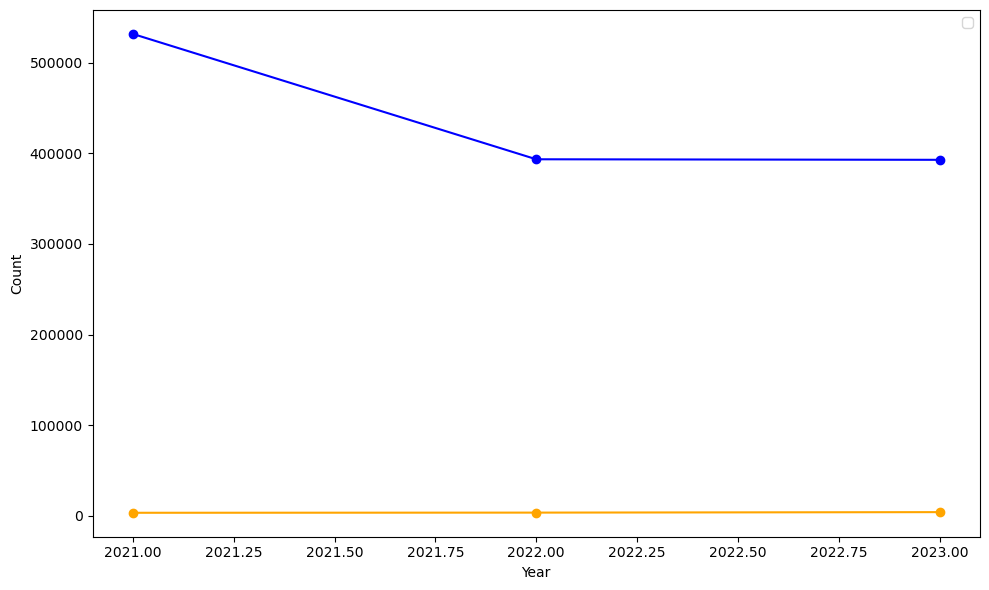

In [135]:
plt.figure(figsize=(10, 6))
plt.plot(crime_unemployment_year['Year'], crime_unemployment_year['Value'], marker='o', color='blue')
plt.plot(crime_unemployment_year['Year'], crime_unemployment_year['Crime Count'], marker='o', color='Orange')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend()
plt.tight_layout()
plt.show()